# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as mp
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import tensorflow as tf


# **Importing Datasets**

In [2]:
train = pd.read_csv('Resources/train.csv')
stores = pd.read_csv('Resources/stores.csv')
features = pd.read_csv('Resources/features.csv')

test = pd.read_csv('Resources/test.csv')


In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# **Data Prep**

In [7]:
DataTrain = train.merge(features,how='left',indicator=True).merge(stores,how='left')
DataTrain.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [8]:
test = test.merge(features,how='left',indicator=True).merge(stores,how='left')
 

In [9]:
DataTrain.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
_merge               0
Type                 0
Size                 0
dtype: int64

In [10]:
test.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
_merge              0
Type                0
Size                0
dtype: int64

In [11]:
DataTrain

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [12]:
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,both,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,both,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,both,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,both,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,both,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,both,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,both,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,both,B,118221


In [13]:
# MARK downs has a lot of null for this model we will drop this column and might come back to see if this does change anything as well as '_merge'
DataTrain_mark =DataTrain.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge' ,'CPI','Unemployment'],axis=1)
test =test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge' ,'CPI','Unemployment'],axis=1)
DataTrain_mark.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,A,151315


In [14]:
# Check weekly sales for outliners with negative values 
DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,A,151315
...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,B,118221


In [15]:
DataTrain_outliners  =DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']>0]
DataTrain_outliners.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,A,151315


In [16]:
DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.
test['year'] = pd.DatetimeIndex(test['Date']).year #Separating year data.
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23392\1505515915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,A,151315,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,A,151315,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,A,151315,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,A,151315,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,A,151315,2010


In [17]:
DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data
test['month'] = pd.DatetimeIndex(test['Date']).month #extract month data
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23392\2895721094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,A,151315,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,A,151315,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,A,151315,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,A,151315,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,A,151315,2010,3


In [18]:
DataTrain_outliners.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
Type             object
Size              int64
year              int32
month             int32
dtype: object

In [19]:
DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])
test['Date'] =   pd.to_datetime(test['Date'])

C:\Users\david\AppData\Local\Temp\ipykernel_23392\4226851745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])


In [20]:
for var in DataTrain_outliners:
    if DataTrain_outliners[var].dtypes == float:
        DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
        
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)        
        

C:\Users\david\AppData\Local\Temp\ipykernel_23392\64037848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_23392\64037848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_23392\64037848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [21]:
DataTrain_outliners.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales             int32
IsHoliday                 bool
Temperature              int32
Fuel_Price               int32
Type                    object
Size                     int64
year                     int32
month                    int32
dtype: object

In [22]:
DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week
test['week'] =  test['Date'].dt.isocalendar().week
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23392\365054253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week
0,1,1,2010-02-05,24924,False,42,2,A,151315,2010,2,5
1,1,1,2010-02-12,46039,True,38,2,A,151315,2010,2,6
2,1,1,2010-02-19,41595,False,39,2,A,151315,2010,2,7
3,1,1,2010-02-26,19403,False,46,2,A,151315,2010,2,8
4,1,1,2010-03-05,21827,False,46,2,A,151315,2010,3,9


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

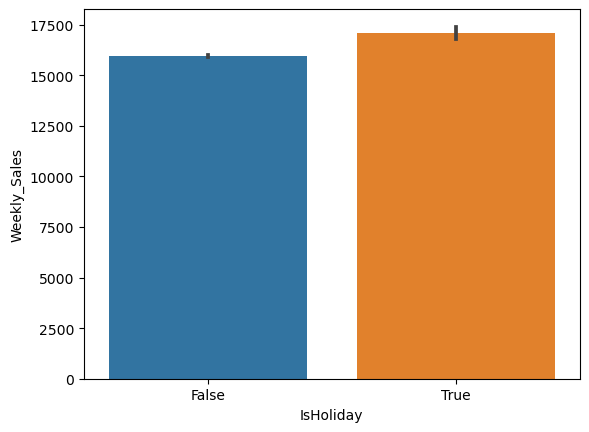

In [23]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=DataTrain_outliners)

In [24]:
df_holiday = DataTrain_outliners.loc[DataTrain_outliners['IsHoliday']==True]
df_holiday['Date'].nunique() 

10

In [25]:
df_not_holiday = DataTrain_outliners.loc[DataTrain_outliners['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

In [26]:
# Super bowl dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-02-12')&(DataTrain_outliners['Date'] != '2011-02-11')&(DataTrain_outliners['Date'] != '2012-02-10'),'Super_Bowl'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_23392\2482144801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_23392\2482144801.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = 

In [27]:
# Labor day dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-09-10')&(DataTrain_outliners['Date'] != '2011-09-09')&(DataTrain_outliners['Date'] != '2012-09-07'),'Labor_Day'] = False


C:\Users\david\AppData\Local\Temp\ipykernel_23392\2571969952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_23392\2571969952.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = Tr

In [28]:
# Thanksgiving dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-11-26')&(DataTrain_outliners['Date'] != '2011-11-25'),'Thanksgiving'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_23392\1294592638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_23392\1294592638.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True


In [29]:
#Christmas dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-12-31')&(DataTrain_outliners['Date'] != '2011-12-30'),'Christmas'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_23392\1507395381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_23392\1507395381.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

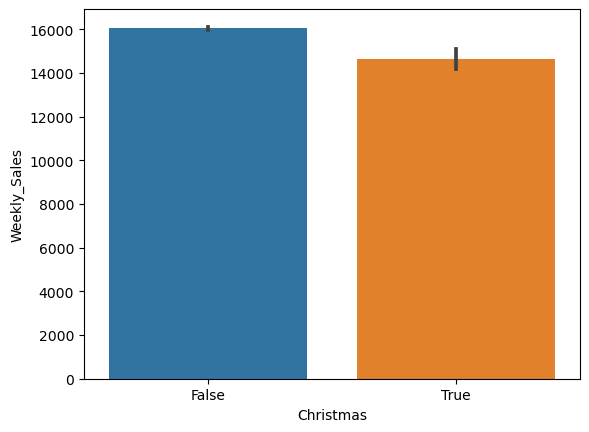

In [30]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=DataTrain_outliners) # Christmas holiday vs not-Christmas

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

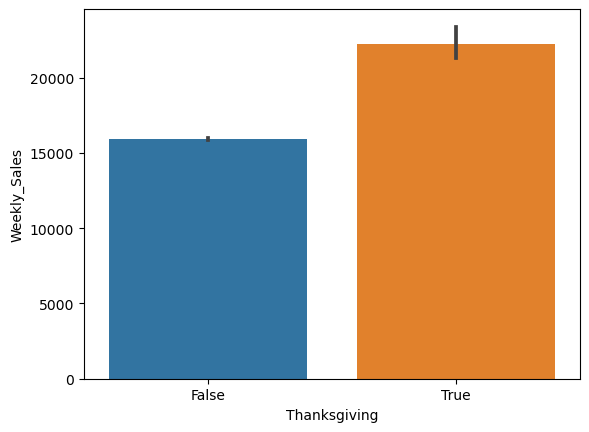

In [31]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=DataTrain_outliners) # Thanksgiving holiday vs not-thanksgiving

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

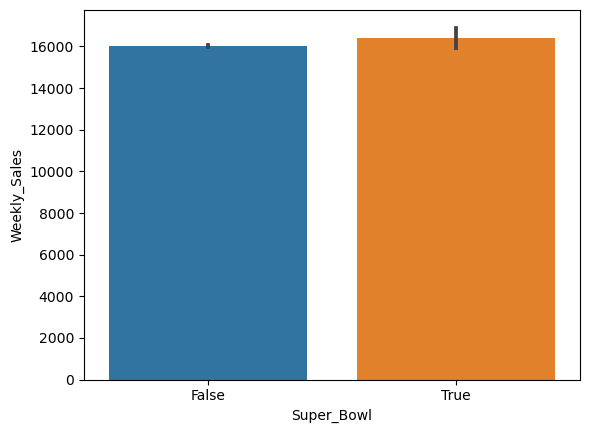

In [32]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=DataTrain_outliners) # Super bowl holiday vs not-super bowl

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

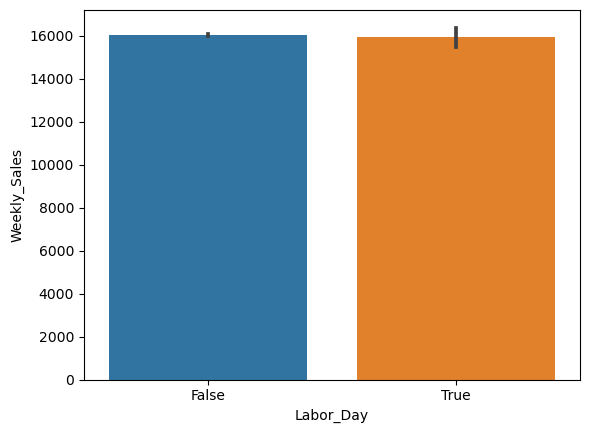

In [33]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=DataTrain_outliners) # Labor day holiday vs not-labor day

In [34]:
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



# Encode labels in column 'species'.
DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])


test['IsHoliday']= label_encoder.fit_transform(test['IsHoliday'])
test['Type']= label_encoder.fit_transform(test['Type'])


DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23392\3696042776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
C:\Users\david\AppData\Local\Temp\ipykernel_23392\3696042776.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924,0,42,2,0,151315,2010,2,5,False,False,False,False
1,1,1,2010-02-12,46039,1,38,2,0,151315,2010,2,6,True,False,False,False
2,1,1,2010-02-19,41595,0,39,2,0,151315,2010,2,7,False,False,False,False
3,1,1,2010-02-26,19403,0,46,2,0,151315,2010,2,8,False,False,False,False
4,1,1,2010-03-05,21827,0,46,2,0,151315,2010,3,9,False,False,False,False


                 Store      Dept      Date  Weekly_Sales  IsHoliday  \
Store         1.000000  0.024258  0.003159     -0.085117  -0.000522   
Dept          0.024258  1.000000  0.003993      0.148750   0.000663   
Date          0.003159  0.003993  1.000000     -0.000571  -0.012957   
Weekly_Sales -0.085117  0.148750 -0.000571      1.000000   0.012843   
IsHoliday    -0.000522  0.000663 -0.012957      0.012843   1.000000   
Temperature  -0.050153  0.004721  0.146725     -0.002365  -0.156000   
Fuel_Price    0.047181  0.004549  0.719674      0.001272  -0.024747   
Type          0.226352  0.003157  0.004090     -0.182230  -0.001000   
Size         -0.182763 -0.002491 -0.005122      0.244118   0.000797   
year          0.002831  0.003716  0.941465     -0.010015  -0.056572   
month         0.000907  0.000800  0.146420      0.028401   0.123058   
week          0.000926  0.000767  0.160330      0.027659   0.127846   
Super_Bowl   -0.000802  0.000553 -0.063770      0.002492   0.533922   
Labor_

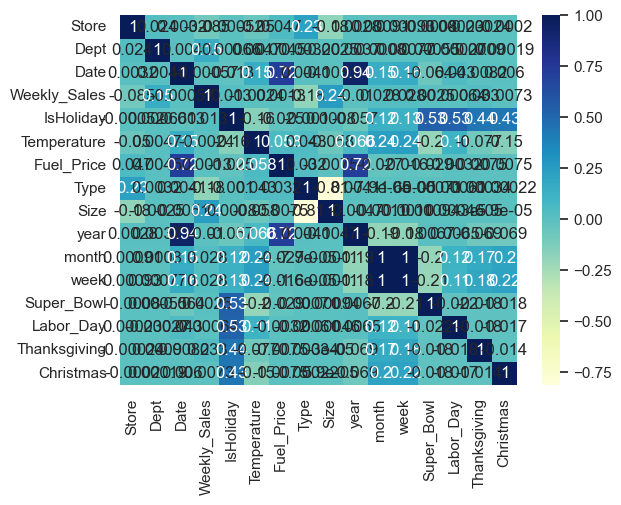

In [35]:
data = DataTrain_outliners

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [36]:
DataTrain_test =DataTrain_outliners.drop(['Date','Super_Bowl','Labor_Day','Thanksgiving','Christmas'],axis=1)
#test =test.drop(['Date' ],axis=1)

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050153   
Dept          0.024258  1.000000      0.148750   0.000663     0.004721   
Weekly_Sales -0.085117  0.148750      1.000000   0.012843    -0.002365   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.156000   
Temperature  -0.050153  0.004721     -0.002365  -0.156000     1.000000   
Fuel_Price    0.047181  0.004549      0.001272  -0.024747     0.058424   
Type          0.226352  0.003157     -0.182230  -0.001000     0.043026   
Size         -0.182763 -0.002491      0.244118   0.000797    -0.058394   
year          0.002831  0.003716     -0.010015  -0.056572     0.065638   
month         0.000907  0.000800      0.028401   0.123058     0.235518   
week          0.000926  0.000767      0.027659   0.127846     0.235800   

              Fuel_Price      Type      Size      year     month      week  
Store           0.047181  0.226352

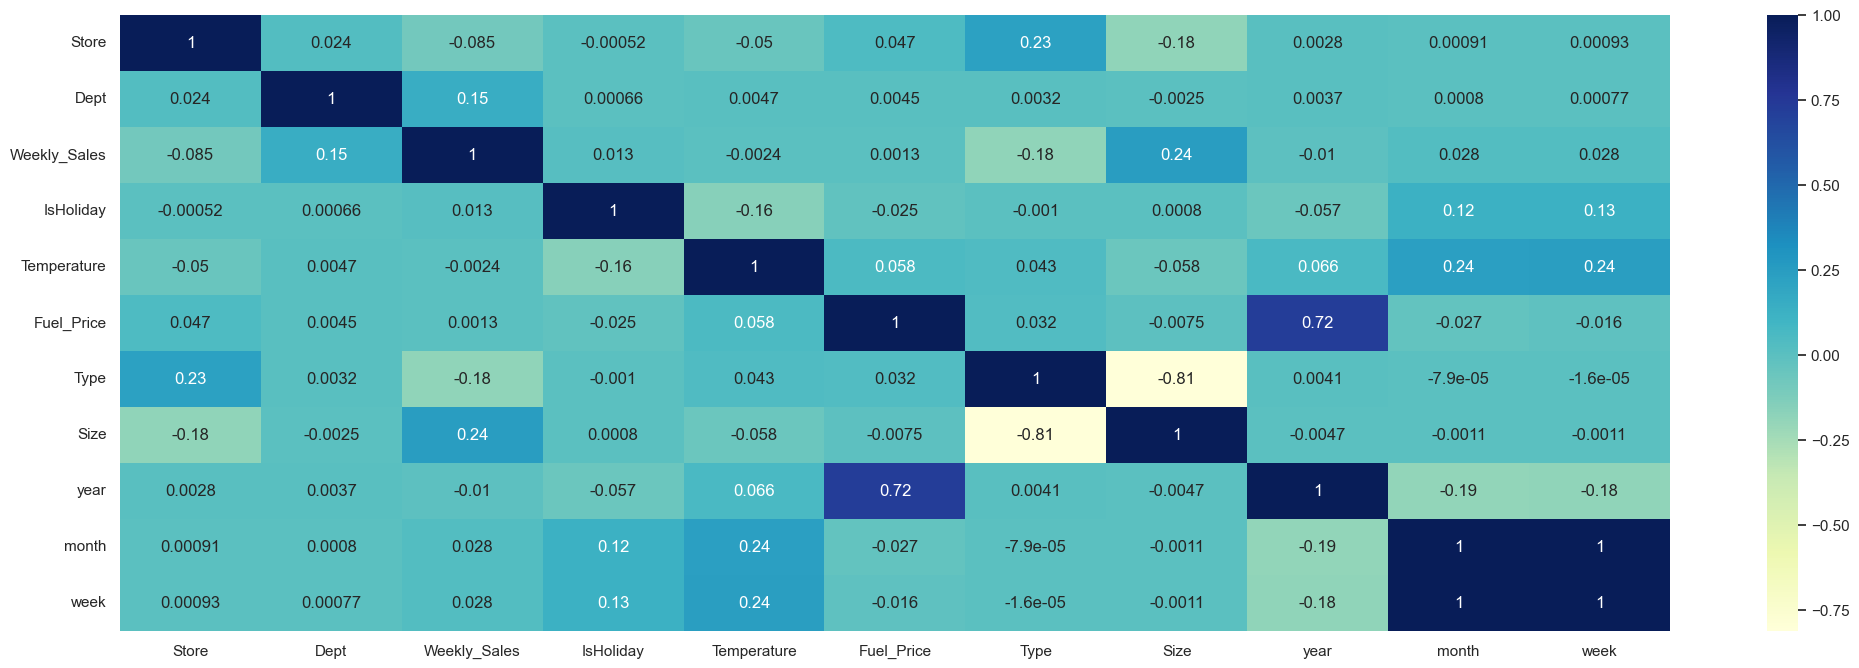

In [37]:
data1 = DataTrain_test

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data1.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

C:\Users\david\AppData\Local\Temp\ipykernel_23392\979720859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1.Weekly_Sales)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

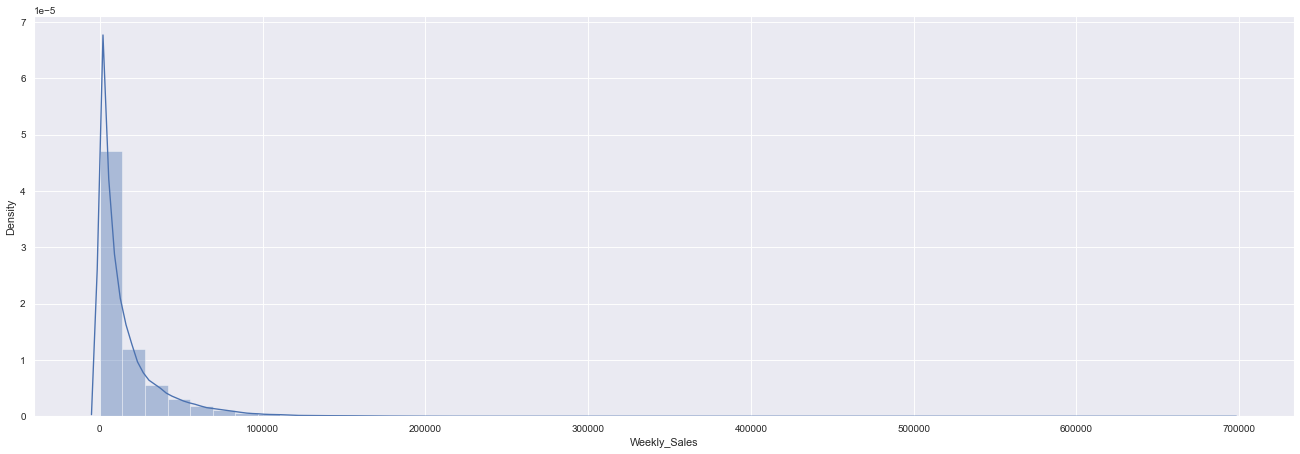

In [38]:
plt.figure(dpi=65)
sns.distplot(data1.Weekly_Sales)

<Axes: >

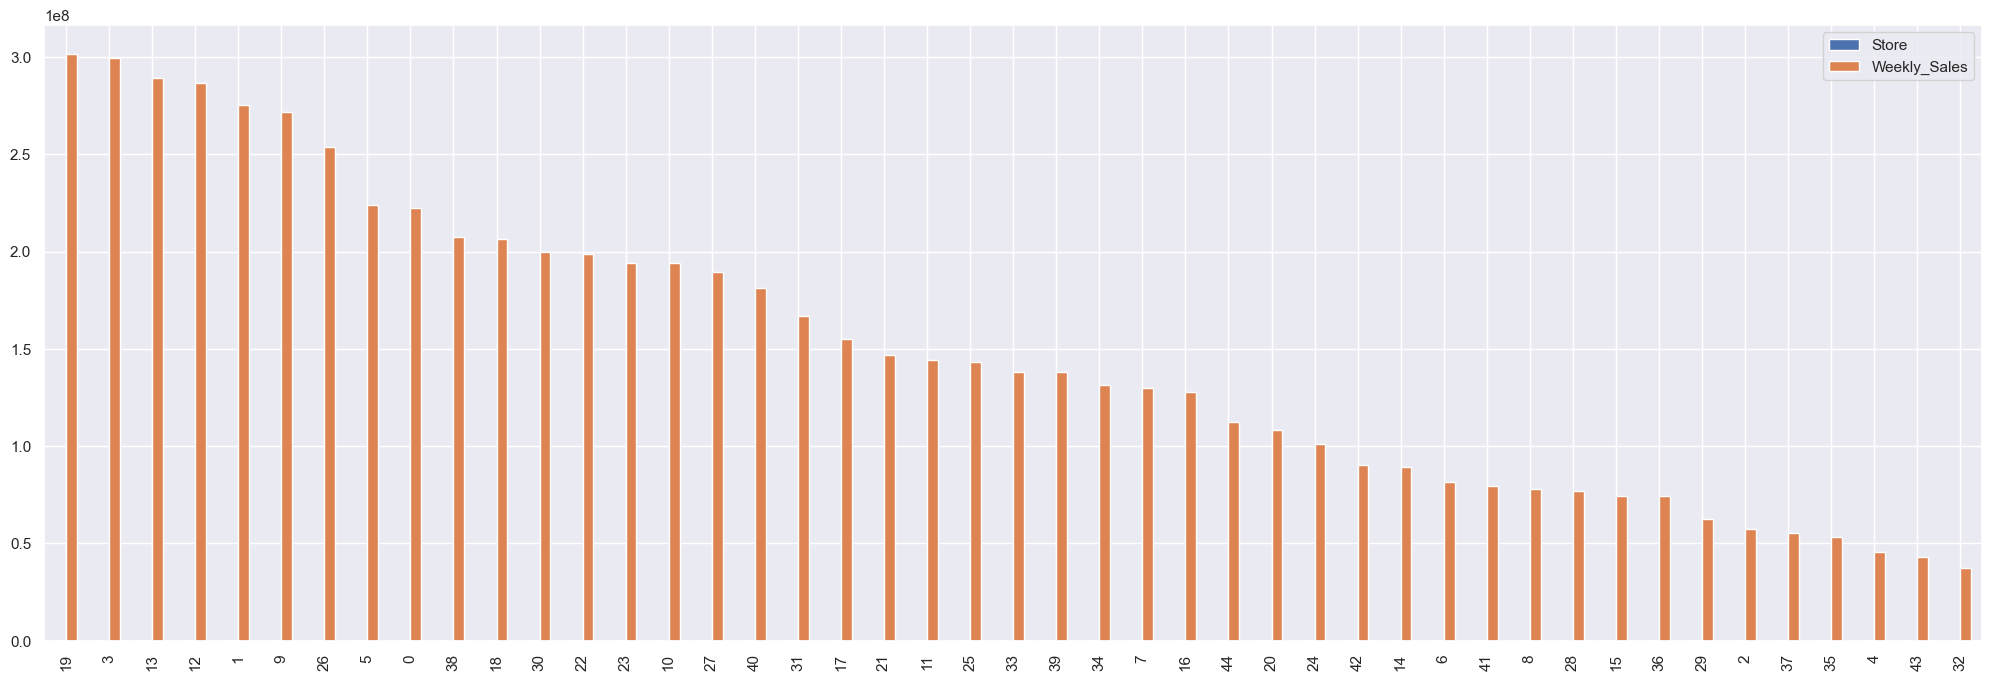

In [39]:
data1.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

#train.plot(kind='barh',x='Weekly_Sales', y='Store', alpha=0.5)

In [40]:
data1.columns 

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'Type', 'Size', 'year', 'month', 'week'],
      dtype='object')

In [41]:
data_test = data1

In [42]:
data_test.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week
0,1,1,24924,0,42,2,0,151315,2010,2,5
1,1,1,46039,1,38,2,0,151315,2010,2,6
2,1,1,41595,0,39,2,0,151315,2010,2,7
3,1,1,19403,0,46,2,0,151315,2010,2,8
4,1,1,21827,0,46,2,0,151315,2010,3,9


In [43]:
#   train X= Exery thing except Weekly_Sales 
train_X=data_test.drop(['Weekly_Sales'], axis=1)

#  train Y= Only Weekly_Sales 
train_y=data_test['Weekly_Sales'] 
test_X= test.drop('Date',axis=1)

train_X.shape, train_y.shape, test_X.shape

((420212, 10), (420212,), (115064, 10))

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
lm = LinearRegression(n_jobs=-1)
lm.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [46]:
train_X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week
0,1,1,0,42,2,0,151315,2010,2,5
1,1,1,1,38,2,0,151315,2010,2,6
2,1,1,0,39,2,0,151315,2010,2,7
3,1,1,0,46,2,0,151315,2010,2,8
4,1,1,0,46,2,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64,3,1,118221,2012,9,39
421566,45,98,0,64,3,1,118221,2012,10,40
421567,45,98,0,54,4,1,118221,2012,10,41
421568,45,98,0,56,3,1,118221,2012,10,42


In [47]:
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week
0,1,1,2012-11-02,0,55,3,0,151315,2012,11,44
1,1,1,2012-11-09,0,61,3,0,151315,2012,11,45
2,1,1,2012-11-16,0,52,3,0,151315,2012,11,46
3,1,1,2012-11-23,1,56,3,0,151315,2012,11,47
4,1,1,2012-11-30,0,52,3,0,151315,2012,11,48
...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,76,3,1,118221,2013,6,26
115060,45,98,2013-07-05,0,77,3,1,118221,2013,7,27
115061,45,98,2013-07-12,0,79,3,1,118221,2013,7,28
115062,45,98,2013-07-19,0,82,3,1,118221,2013,7,29


In [48]:
train_y

0         24924
1         46039
2         41595
3         19403
4         21827
          ...  
421565      508
421566      628
421567     1061
421568      760
421569     1076
Name: Weekly_Sales, Length: 420212, dtype: int32

In [49]:
# Check data types
print("Data types:")
print("test_X type:", type(test_X))
print("self.coef_ type:", type(lm.coef_))

# Check coefficients shape
print("Coefficient shape:", lm.coef_.shape)

# Ensure test_X is a NumPy array
test_X_np = np.array(test_X)

# Perform prediction
y_pred = lm.predict(test_X_np)

Data types:
test_X type: <class 'pandas.core.frame.DataFrame'>
self.coef_ type: <class 'numpy.ndarray'>
Coefficient shape: (10,)


C:\Users\david\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
y_pred =lm.predict(test_X)
acc_lm = round(lm.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression model: ' +str(acc_lm)+'%')

Accuracy of Linear Regression model: 8.61%


In [51]:
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,Type,Size,year,month,week
0,1,1,2012-11-02,0,55,3,0,151315,2012,11,44
1,1,1,2012-11-09,0,61,3,0,151315,2012,11,45
2,1,1,2012-11-16,0,52,3,0,151315,2012,11,46
3,1,1,2012-11-23,1,56,3,0,151315,2012,11,47
4,1,1,2012-11-30,0,52,3,0,151315,2012,11,48
...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,76,3,1,118221,2013,6,26
115060,45,98,2013-07-05,0,77,3,1,118221,2013,7,27
115061,45,98,2013-07-12,0,79,3,1,118221,2013,7,28
115062,45,98,2013-07-19,0,82,3,1,118221,2013,7,29


In [52]:
%timeit
param_grid={'n_estimators':np.arange(21,101)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=50)
tree.fit(train_X,train_y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True), n_jobs=-1,
             param_grid={'n_estimators': array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100])},
             verbose=50)

In [53]:
tree.best_params_

{'n_estimators': 37}

In [54]:
clf_rf = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 37building tree 2 of 37
building tree 3 of 37

building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37


[Parallel(n_jobs=-1)]: Done  14 out of  37 | elapsed:   12.3s remaining:   20.3s


building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:   20.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:   23.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  22 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  37 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  22 out of  37 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  30 out of  37 | elapsed:    0.5s remaining:    0.0s


Accuracy of Random Forest model: 99.68%


[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.7s finished


In [55]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest'],
                      'Score':[acc_lm,acc_rf]})
models.sort_values(by='Score',ascending= False)

,Model,Score
1,Random Forest,99.68
0,Linear Regression,8.61


In [56]:
submission = pd.DataFrame({
    'Store': test.Store.astype(str),
    'Dept': test.Dept.astype(str),
    'Date': test.Date.astype(str),
    'Weekly_Sales' : y_pred_rf.round(2)})
submission.to_csv('Resources/weekly_sales Predicted.csv',index=False)

In [57]:

data = pd.read_csv('Resources/weekly_sales Predicted.csv')

# Try inferring the datetime format or specify multiple formats to cover different date formats
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Define the holiday dates
holiday_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08',
                 '2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06',
                 '2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29',
                 '2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']

# Convert holiday_dates to datetime format
holiday_dates = pd.to_datetime(holiday_dates)

# Create the 'IsHoliday' column based on whether the date is a holiday or not
data['IsHoliday'] = data['Date'].isin(holiday_dates)

# Convert the 'IsHoliday' column to bool type (True or False)
data['IsHoliday'] = data['IsHoliday'].astype(bool)

# Save the updated DataFrame to a new CSV file
data.to_csv('Resources/weekly_sales Predicted2.csv', index=False)
